In [1]:
#install.packages("tidyr")

In [2]:
library(ggplot2)
library(tidyr)

In [3]:
matriz_transicion <- matrix(c(0.6,0.3,0.1,
                            0.4,0.4,0.2,
                            0.2,0.3,0.5),
                            nrow=3, byrow=TRUE)

In [4]:
estados <- c("Soleado", "Nublado", "Lluvioso")

In [5]:
#Imprimir matriz de transicion
print(matriz_transicion)

     [,1] [,2] [,3]
[1,]  0.6  0.3  0.1
[2,]  0.4  0.4  0.2
[3,]  0.2  0.3  0.5


In [6]:
estado_inicial <- c(1,0,0) # 100% de probabilidad de soleado

In [7]:
# Dataframe para almacenar las probabilidades 
probabilidades <- data.frame(
    Dia = 0:10,
    Soleado = numeric(11), 
    Nublado = numeric(11),
    Lluvioso = numeric(11)
)

In [8]:
# Asignar probabilidades iniciales 
probabilidades [1, 2:4] <- estado_inicial

In [9]:
# Calcular la probabilidad del clima para los siguientes 10 dias 
for ( dia in 1:10) {
    # Multiplicacion de matrices en R
    estado_inicial <- estado_inicial %*% matriz_transicion
    probabilidades[dia, 2:4] <- estado_inicial
}

In [10]:
print(probabilidades)

   Dia   Soleado   Nublado  Lluvioso
1    0 0.6000000 0.3000000 0.1000000
2    1 0.5000000 0.3300000 0.1700000
3    2 0.4660000 0.3330000 0.2010000
4    3 0.4530000 0.3333000 0.2137000
5    4 0.4478600 0.3333300 0.2188100
6    5 0.4458100 0.3333330 0.2208570
7    6 0.4449906 0.3333333 0.2216761
8    7 0.4446629 0.3333333 0.2220038
9    8 0.4445318 0.3333333 0.2221348
10   9 0.4444794 0.3333333 0.2221873
11  10 0.0000000 0.0000000 0.0000000


In [11]:
# Convertir dataframe a formato largo
probabilidades_2 <- pivot_longer(probabilidades, cols= -Dia, names_to = "Estado", values_to = "Probabilidad")

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


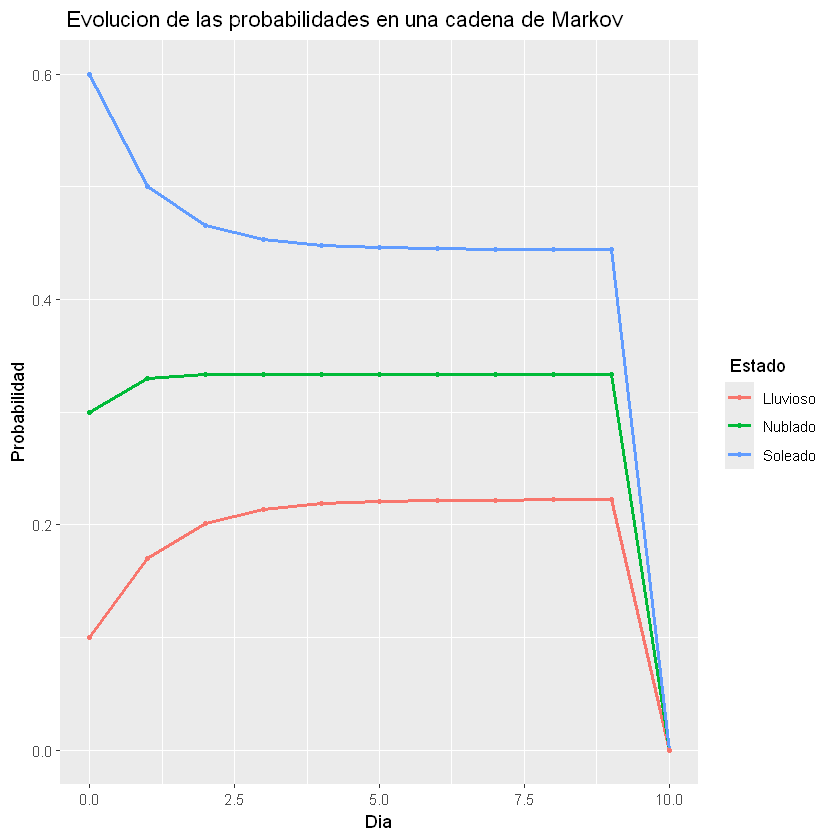

In [12]:
# Crear la gráfica
ggplot(data = probabilidades_2, aes(x=Dia, y=Probabilidad, color= Estado)) + 
geom_line(size = 1) + 
geom_point(size = 1) + 
labs(title = " Evolucion de las probabilidades en una cadena de Markov",
x = "Dia",
y= "Probabilidad", 
color = " Estado")

### Ejercicio 
* Si hoy estas "Saludable", hay un 70% de probabilidad de permanecer "Saludable", un 20% de probabilidad de enfermarse y un 10% de probabilidad de recuperarse ( lo cual es una simplificación para el propósito del ejemplo).
* Si hoy estas 'Enfermo', hay un 30% de probabilidad de recuperar la salud, un 40% de probabilidad de permanecer enfermo y un 30% de probabilidad de recuperarse.
* Si hoy estas 'Recuperado', hay un 60% de probabilidad de permanecer recuperado, un 30% de probabilidad de enfermarse nuevamente y un 10% de probabilidad de recuperar la salud 


In [24]:
matriz_transicion <- matrix(c(0.7,0.2,0.1,
                            0.3,0.4,0.3,
                            0.1,0.3,0.6),
                            nrow=3, byrow=TRUE)

In [25]:
estados <- c("Saludable", "Enfermar", "Recuperarse")

In [26]:
estado_inicial <- c(1,0,0) # 100% de probabilidad de soleado

In [27]:
# Dataframe para almacenar las probabilidades 
probabilidades <- data.frame(
    Dia = 0:10,
    Saludable = numeric(11), 
    Enfermar = numeric(11),
    Recuperarse = numeric(11)
)

In [28]:
# Asignar probabilidades iniciales 
probabilidades [1, 2:4] <- estado_inicial

In [29]:
# Calcular la probabilidad del clima para los siguientes 10 dias 
for ( dia in 1:10) {
    # Multiplicacion de matrices en R
    estado_inicial <- estado_inicial %*% matriz_transicion
    probabilidades[dia + 1, 2:4] <- estado_inicial
}

In [30]:
print(probabilidades)

   Dia Saludable  Enfermar Recuperarse
1    0 1.0000000 0.0000000   0.0000000
2    1 0.7000000 0.2000000   0.1000000
3    2 0.5600000 0.2500000   0.1900000
4    3 0.4860000 0.2690000   0.2450000
5    4 0.4454000 0.2783000   0.2763000
6    5 0.4229000 0.2832900   0.2938100
7    6 0.4103980 0.2860390   0.3035630
8    7 0.4034466 0.2875641   0.3089893
9    8 0.3995808 0.2884117   0.3120075
10   9 0.3974308 0.2888831   0.3136861
11  10 0.3962351 0.2891452   0.3146197


In [31]:
# Convertir dataframe a formato largo
probabilidades_2 <- pivot_longer(probabilidades, cols= -Dia, names_to = "Estado", values_to = "Probabilidad")

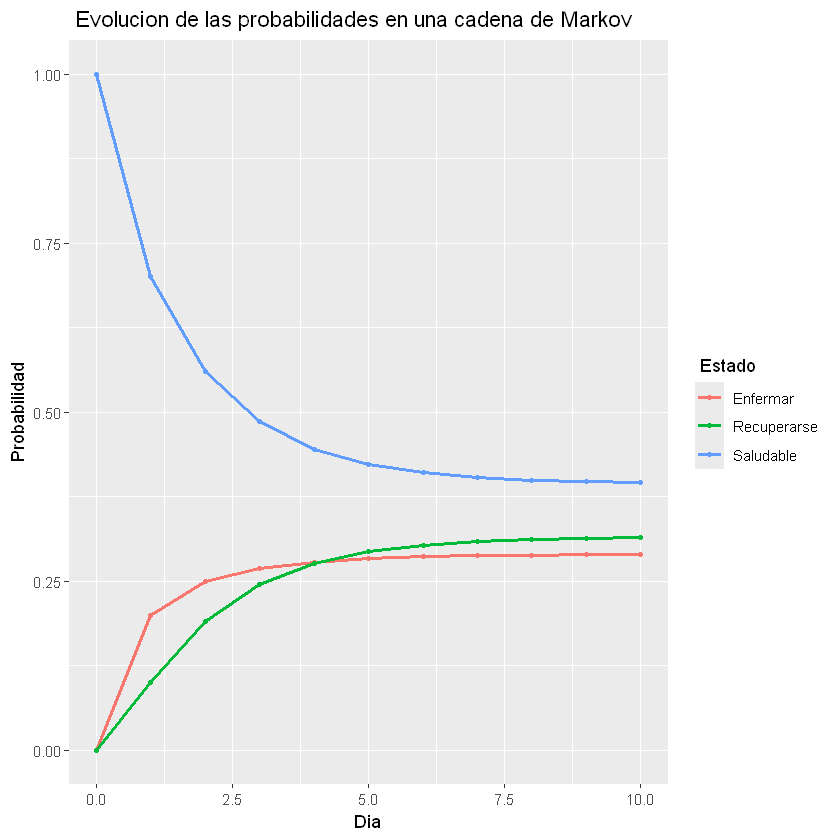

In [32]:
# Crear la gráfica
ggplot(data = probabilidades_2, aes(x=Dia, y=Probabilidad, color= Estado)) + 
geom_line(size = 1) + 
geom_point(size = 1) + 
labs(title = " Evolucion de las probabilidades en una cadena de Markov",
x = "Dia",
y= "Probabilidad", 
color = " Estado")